In [58]:
import numpy as np
import pandas as pd

In [59]:
df = pd.read_csv("C:/Users/sertac/Desktop/ayb-ceng463-machine-learning-project-fall-2022/train.csv")
dfTest = pd.read_csv("C:/Users/sertac/Desktop/ayb-ceng463-machine-learning-project-fall-2022/test.csv")

In [60]:
df.drop("Index", axis=1, inplace=True)
dfTest.drop("Id", axis=1, inplace=True)

Removing zeros

In [61]:
df = df[df.Code != 0]

In [62]:
labelArr = df["Code"].values[1:967005:30]

In [63]:
df.drop("Code", axis=1, inplace=True)

In [64]:
dataArr = df.values[1:967005:30]

In [65]:
np.unique(labelArr, return_counts=False)

array([10, 20, 30, 40, 50, 60, 80, 90], dtype=int64)

In [66]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(dataArr, labelArr, test_size = 0.3)

## First Part

### Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)
y_pred_bayes = nb.predict(X_test)

In [68]:
from sklearn.metrics import r2_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


#scores
r2_bayes = r2_score(y_test, y_pred_bayes)
acc_bayes = accuracy_score(y_test, y_pred_bayes)

print(f"R2 score = {r2_bayes}\nAccuracy score = {acc_bayes}")

R2 score = 0.8711840965234214
Accuracy score = 0.8468468468468469


In [69]:
print(classification_report(y_test, y_pred_bayes, zero_division=1))

              precision    recall  f1-score   support

          10       0.39      0.37      0.38       553
          20       0.27      0.92      0.42       154
          30       0.63      0.52      0.57      1067
          40       1.00      0.00      0.00        39
          50       0.77      0.80      0.78      1494
          60       1.00      0.00      0.00       157
          80       0.99      0.98      0.99      6176
          90       1.00      0.00      0.00        17

    accuracy                           0.85      9657
   macro avg       0.76      0.45      0.39      9657
weighted avg       0.87      0.85      0.84      9657



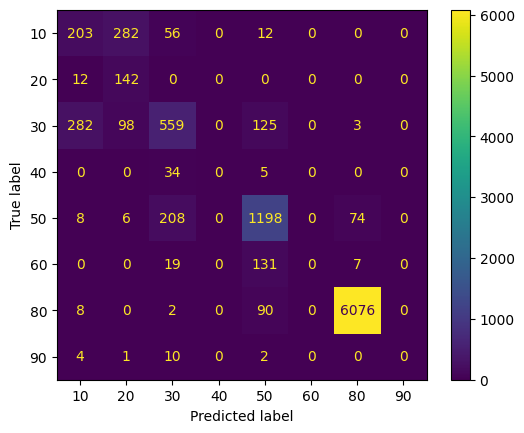

In [70]:
# Creating confusion matrix data
confusion_matrix_linear = confusion_matrix(y_test, y_pred_bayes)
#display
labels = ['10', '20', '30', '40', '50', '60', '80', '90']
cm_displayLinear = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_linear, display_labels=labels)

cm_displayLinear.plot()
plt.show()

### KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier()

# Fit
modelKNN.fit(X_train, y_train)

#Predict
y_pred_KNN = modelKNN.predict(X_test)

In [72]:
#scores
r2_knn = r2_score(y_test, y_pred_KNN)
acc_knn = accuracy_score(y_test, y_pred_KNN)

print(f"R2 score = {r2_knn}\nAccuracy score = {acc_knn}")

R2 score = 0.9019186330265904
Accuracy score = 0.8924096510303406


In [73]:
print(classification_report(y_test, y_pred_KNN, zero_division=1))

              precision    recall  f1-score   support

          10       0.65      0.65      0.65       553
          20       0.55      0.44      0.49       154
          30       0.67      0.73      0.70      1067
          40       0.33      0.21      0.25        39
          50       0.80      0.84      0.82      1494
          60       0.58      0.24      0.33       157
          80       1.00      0.99      0.99      6176
          90       0.00      0.00      0.00        17

    accuracy                           0.89      9657
   macro avg       0.57      0.51      0.53      9657
weighted avg       0.89      0.89      0.89      9657



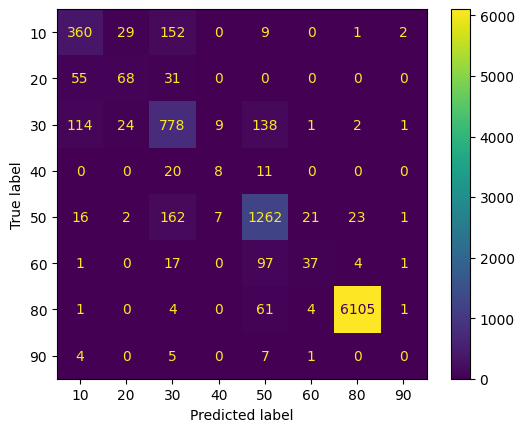

In [74]:
# Creating confusion matrix data
confusion_matrix_linear = confusion_matrix(y_test, y_pred_KNN)
#display
labels = ['10', '20', '30', '40', '50', '60', '80', '90']
cm_displayLinear = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_linear, display_labels=labels)

cm_displayLinear.plot()
plt.show()

### Second Part

### Normalization and mean cleaning

### Grid Search Bayes

In [ ]:
# Libraries that are going to need in this part,
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid_Bayes = {'var_smoothing': np.logspace(0,-9, num=100)}
  
grid_Bayes = GridSearchCV(GaussianNB(), param_grid_Bayes, refit = True, verbose = 3)
  
# fitting the model for grid search
grid_Bayes.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .................var_smoothing=1.0;, score=0.770 total time=   0.0s
[CV 2/5] END .................var_smoothing=1.0;, score=0.766 total time=   0.0s
[CV 3/5] END .................var_smoothing=1.0;, score=0.770 total time=   0.0s
[CV 4/5] END .................var_smoothing=1.0;, score=0.770 total time=   0.0s
[CV 5/5] END .................var_smoothing=1.0;, score=0.769 total time=   0.0s
[CV 1/5] END ..var_smoothing=0.8111308307896871;, score=0.791 total time=   0.0s
[CV 2/5] END ..var_smoothing=0.8111308307896871;, score=0.785 total time=   0.0s
[CV 3/5] END ..var_smoothing=0.8111308307896871;, score=0.787 total time=   0.0s
[CV 4/5] END ..var_smoothing=0.8111308307896871;, score=0.788 total time=   0.0s
[CV 5/5] END ..var_smoothing=0.8111308307896871;, score=0.789 total time=   0.0s
[CV 1/5] END ...var_smoothing=0.657933224657568;, score=0.811 total time=   0.0s
[CV 2/5] END ...var_smoothing=0.65793322465756

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3101297...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=3)

In [ ]:
y_pred_grid_Bayes = grid_Bayes.predict(X_test)

In [ ]:
#scores
r2_grid_Bayes = r2_score(y_test, y_pred_grid_Bayes)
acc_grid_Bayes = accuracy_score(y_test, y_pred_grid_Bayes)

print(f"R2 score = {r2_grid_Bayes}\nAccuracy score = {acc_grid_Bayes}")

R2 score = 0.8605228835610024
Accuracy score = 0.8635045567522783


In [ ]:
print(classification_report(y_test, y_pred_grid_Bayes, zero_division=1))

              precision    recall  f1-score   support

          10       0.51      0.81      0.63      1748
          20       1.00      0.00      0.00       451
          30       0.64      0.61      0.62      3154
          40       1.00      0.00      0.00       126
          50       0.78      0.75      0.76      4420
          60       1.00      0.00      0.00       465
          80       0.97      0.99      0.98     18545
          90       1.00      0.00      0.00        59

    accuracy                           0.86     28968
   macro avg       0.86      0.39      0.37     28968
weighted avg       0.88      0.86      0.85     28968



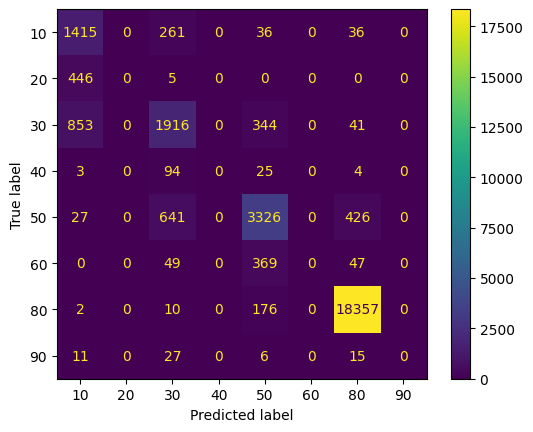

In [ ]:
# Creating confusion matrix data
confusion_matrix_linear = confusion_matrix(y_test, y_pred_grid_Bayes)
#display
labels = ['10', '20', '30', '40', '50', '60', '80', '90']
cm_displayLinear = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_linear, display_labels=labels)

cm_displayLinear.plot()
plt.show()

### Grid Search KNN

### Manual

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


r2_valuesKNN = []
f1_valuesKNN = []
acc_valuesKNN = []


for k in range(1, 50, 3):
    # Model creation
    modelKNN = KNeighborsClassifier(n_neighbors=k)

    # Fit
    modelKNN.fit(X_train, y_train.ravel())
    
    #Predict
    y_predKNN = modelKNN.predict(X_test)

    r2_valuesKNN.append(r2_score(y_test, y_predKNN))
    acc_valuesKNN.append(accuracy_score(y_test, y_predKNN))

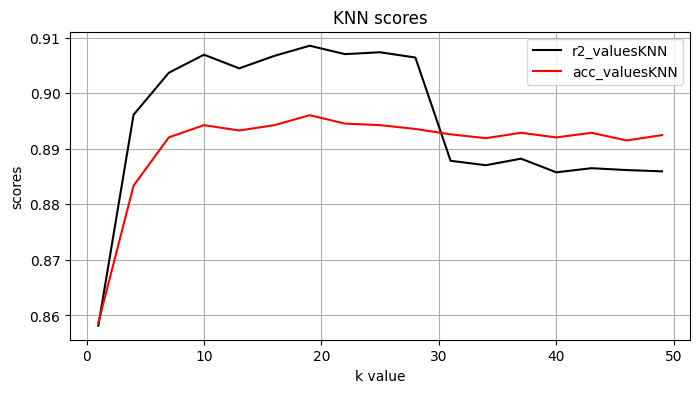

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))

plt.plot(range(1, 50, 3), r2_valuesKNN, "k-", label="r2_valuesKNN")
plt.plot(range(1, 50, 3), acc_valuesKNN, "r-", label="acc_valuesKNN")
plt.title("KNN scores")
plt.xlabel("k value")
plt.ylabel("scores")
plt.legend()
plt.grid()

### Grid Search


In [ ]:
# Libraries that are going to need in this part,
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# defining parameter range
k_range = list(range(1,20,2))
param_grid_KNN = {'n_neighbors': k_range}
  
grid_KNN = GridSearchCV(KNeighborsClassifier(), param_grid_KNN, refit = True, verbose = 3)
  
# fitting the model for grid search
grid_KNN.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.867 total time=   0.3s
[CV 2/5] END .....................n_neighbors=1;, score=0.867 total time=   0.3s
[CV 3/5] END .....................n_neighbors=1;, score=0.864 total time=   0.3s
[CV 4/5] END .....................n_neighbors=1;, score=0.870 total time=   0.3s
[CV 5/5] END .....................n_neighbors=1;, score=0.865 total time=   0.3s
[CV 1/5] END .....................n_neighbors=3;, score=0.885 total time=   0.4s
[CV 2/5] END .....................n_neighbors=3;, score=0.884 total time=   0.3s
[CV 3/5] END .....................n_neighbors=3;, score=0.880 total time=   0.3s
[CV 4/5] END .....................n_neighbors=3;, score=0.883 total time=   0.4s
[CV 5/5] END .....................n_neighbors=3;, score=0.885 total time=   0.4s
[CV 1/5] END .....................n_neighbors=5;, score=0.893 total time=   0.4s
[CV 2/5] END .....................n_neighbors=5;

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
             verbose=3)

In [ ]:
y_pred_grid_KNN = grid_KNN.predict(X_test)

In [ ]:
#scores
r2_grid_KNN = r2_score(y_test, y_pred_grid_KNN)
acc_grid_KNN = accuracy_score(y_test, y_pred_grid_KNN)

print(f"R2 score = {r2_grid_KNN}\nAccuracy score = {acc_grid_KNN}")

R2 score = 0.9112653095139209
Accuracy score = 0.8964719690693179


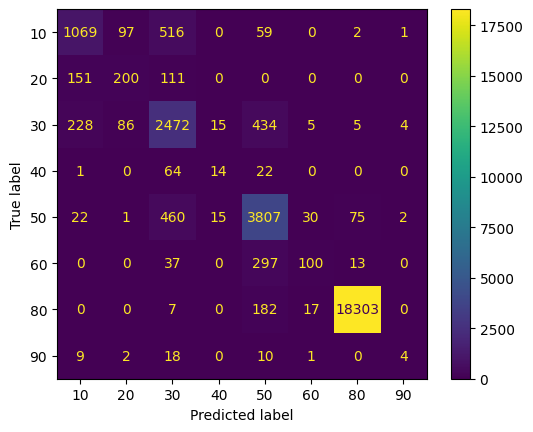

In [ ]:
# Creating confusion matrix data
confusion_matrix_linear = confusion_matrix(y_test, y_pred_grid_KNN)
#display
labels = ['10', '20', '30', '40', '50', '60', '80', '90']
cm_displayLinear = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_linear, display_labels=labels)

cm_displayLinear.plot()
plt.show()

### Grid DT

In [ ]:
# Libraries that are going to need in this part,
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition, datasets
from sklearn import tree

# defining parameter range
std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])
n_components = list(range(1,X_train.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

model_grid_DT = GridSearchCV(pipe, parameters)
model_grid_DT.fit(X_train, y_train)

print('Best Criterion:', model_grid_DT.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', model_grid_DT.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', model_grid_DT.best_estimator_.get_params()['pca__n_components'])
print(); print(model_grid_DT.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 8
Best Number Of Components: 4

DecisionTreeClassifier(max_depth=8)


In [ ]:
y_pred_grid_DT = model_grid_DT.predict(X_test)

In [ ]:
#scores
r2_grid_DT = r2_score(y_test, y_pred_grid_DT)
acc_grid_DT = accuracy_score(y_test, y_pred_grid_DT)

print(f"R2 score = {r2_grid_DT}\nAccuracy score = {acc_grid_DT}")

R2 score = 0.9156054738269568
Accuracy score = 0.8944352388842861


In [ ]:
print(classification_report(y_test, y_pred_grid_DT, zero_division=1))

              precision    recall  f1-score   support

          10       0.71      0.57      0.63      1783
          20       0.42      0.41      0.42       454
          30       0.68      0.75      0.71      3223
          40       0.58      0.17      0.27       121
          50       0.78      0.88      0.83      4272
          60       0.79      0.17      0.28       444
          80       0.99      0.99      0.99     18626
          90       0.44      0.16      0.23        45

    accuracy                           0.89     28968
   macro avg       0.68      0.51      0.55     28968
weighted avg       0.89      0.89      0.89     28968



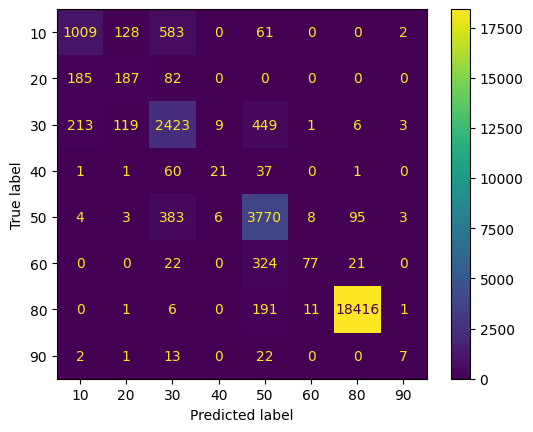

In [ ]:
# Creating confusion matrix data
confusion_matrix_linear = confusion_matrix(y_test, y_pred_grid_DT)
#display
labels = ['10', '20', '30', '40', '50', '60', '80', '90']
cm_displayLinear = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_linear, display_labels=labels)

cm_displayLinear.plot()
plt.show()

### Grid Search Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


modelRF=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200]
}

modelRF_grid = GridSearchCV(estimator=modelRF, param_grid=param_grid, cv= 5)
modelRF_grid.fit(X_train, y_train)

y_pred_RF = modelRF_grid.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


#scores
r2_RF = r2_score(y_test, y_pred_RF)
acc_RF = accuracy_score(y_test, y_pred_RF)

print(f"R2 score = {r2_RF}\nAccuracy score = {acc_RF}")

R2 score = 0.9122441965422676
Accuracy score = 0.8991991162662248


In [ ]:
print(classification_report(y_test, y_pred_RF, zero_division=1))

              precision    recall  f1-score   support

          10       0.71      0.65      0.68      1719
          20       0.58      0.48      0.53       476
          30       0.69      0.72      0.71      3209
          40       0.43      0.13      0.20       127
          50       0.78      0.88      0.83      4322
          60       0.67      0.27      0.39       481
          80       0.99      0.99      0.99     18586
          90       0.43      0.12      0.19        48

    accuracy                           0.90     28968
   macro avg       0.66      0.53      0.56     28968
weighted avg       0.90      0.90      0.90     28968



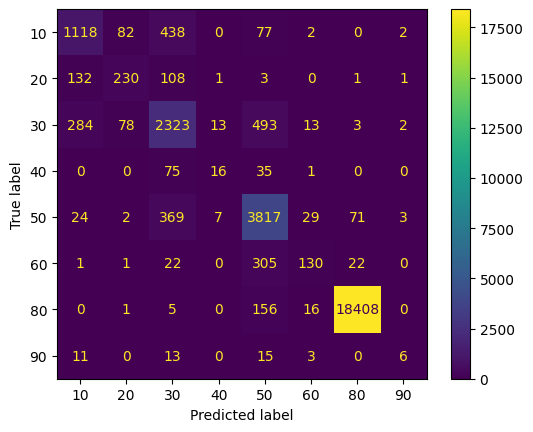

In [ ]:
# Creating confusion matrix data
confusion_matrix_linear = confusion_matrix(y_test, y_pred_RF)
#display
labels = ['10', '20', '30', '40', '50', '60', '80', '90']
cm_displayLinear = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_linear, display_labels=labels)

cm_displayLinear.plot()
plt.show()

### Grid Search Gradient Boosting

In [ ]:
# Libraries that are going to need in this part,
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

  
# defining parameter range
param_grid_GB = {'learning_rate': [0.05, 0.075, 0.25, 0.5, 0.75, 1]}
  
grid_GB = GridSearchCV(GradientBoostingClassifier(), param_grid_GB, refit = True, verbose = 3)
  
# fitting the model for grid search
grid_GB.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ................learning_rate=0.05;, score=0.895 total time=  44.2s
[CV 2/5] END ................learning_rate=0.05;, score=0.900 total time=  44.9s
[CV 3/5] END ................learning_rate=0.05;, score=0.900 total time=  44.6s
[CV 4/5] END ................learning_rate=0.05;, score=0.896 total time=  43.8s
[CV 5/5] END ................learning_rate=0.05;, score=0.899 total time=  43.8s
[CV 1/5] END ...............learning_rate=0.075;, score=0.897 total time=  44.5s
[CV 2/5] END ...............learning_rate=0.075;, score=0.901 total time=  43.7s
[CV 3/5] END ...............learning_rate=0.075;, score=0.901 total time=  43.5s
[CV 4/5] END ...............learning_rate=0.075;, score=0.897 total time=  43.3s
[CV 5/5] END ...............learning_rate=0.075;, score=0.900 total time=  44.0s
[CV 1/5] END ................learning_rate=0.25;, score=0.897 total time=  44.4s
[CV 2/5] END ................learning_rate=0.25;,

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.075, 0.25, 0.5, 0.75, 1]},
             verbose=3)

In [ ]:
y_pred_grid_GB = grid_GB.predict(X_test)

In [ ]:
#scores
r2_grid_GB = r2_score(y_test, y_pred_grid_GB)
acc_grid_GB = accuracy_score(y_test, y_pred_grid_GB)

print(f"R2 score = {r2_grid_GB}\nAccuracy score = {acc_grid_GB}")

R2 score = 0.9124627290423193
Accuracy score = 0.8956089478044739


In [ ]:
print(classification_report(y_test, y_pred_grid_GB, zero_division=1))

              precision    recall  f1-score   support

          10       0.75      0.60      0.67      1700
          20       0.56      0.51      0.53       481
          30       0.68      0.74      0.71      3203
          40       0.29      0.04      0.07       128
          50       0.76      0.88      0.82      4348
          60       0.67      0.21      0.32       479
          80       0.99      0.99      0.99     18586
          90       0.25      0.12      0.16        43

    accuracy                           0.90     28968
   macro avg       0.62      0.51      0.53     28968
weighted avg       0.89      0.90      0.89     28968



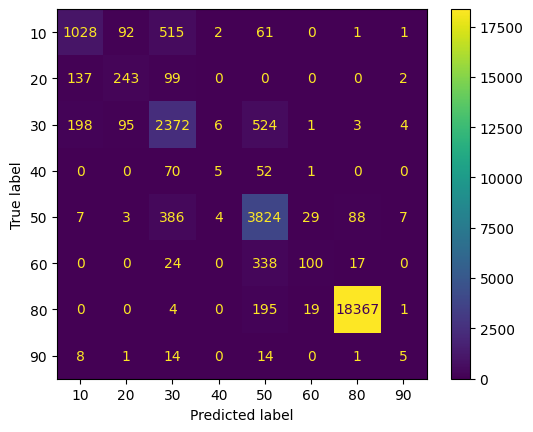

In [ ]:
# Creating confusion matrix data
confusion_matrix_linear = confusion_matrix(y_test, y_pred_grid_GB)
#display
labels = ['10', '20', '30', '40', '50', '60', '80', '90']
cm_displayLinear = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_linear, display_labels=labels)

cm_displayLinear.plot()
plt.show()

## Grid Search SVM

In [ ]:
# Libraries that are going to need in this part,
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}
  
grid = GridSearchCV(SVC(cache_size=4096), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)



Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.640 total time= 1.9min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time= 1.8min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time= 1.8min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time= 1.8min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time= 1.8min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.640 total time= 1.8min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.643 total time= 1.8min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.641 total time= 1.8min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.641 total time= 2.0min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.641 total time= 2.0min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.640 total time= 1.4min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(cache_size=4096),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# score
print(grid.score(X_test,y_test))

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=10, cache_size=4096, gamma=0.001)
0.8407555494278229


## Third Part

In [ ]:
# For the training data
for i in ["Blue", "Green", "Red", "NIR"]:
    upper_limit = df[f'{i}'].mean() + 3*df[f'{i}'].std()
    lower_limit = df[f'{i}'].mean() - 3*df[f'{i}'].std()

    df[f'{i}'] = np.where(
    df[f'{i}']>upper_limit,
    upper_limit,
    np.where(
        df[f'{i}']<lower_limit,
        lower_limit,
        df[f'{i}']
    )
)

# For the testing data
for i in ["Blue", "Green", "Red", "NIR"]:
    upper_limit = dfTest[f'{i}'].mean() + 3*dfTest[f'{i}'].std()
    lower_limit = dfTest[f'{i}'].mean() - 3*dfTest[f'{i}'].std()

    dfTest[f'{i}'] = np.where(
    dfTest[f'{i}']>upper_limit,
    upper_limit,
    np.where(
        dfTest[f'{i}']<lower_limit,
        lower_limit,
        dfTest[f'{i}']
    )
)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
scaled = scaler.fit_transform(df)

df = pd.DataFrame(scaled, columns=df.columns)

In [ ]:
scalerTest = MinMaxScaler()
scalerTest.fit(dfTest)
scaledTest = scalerTest.fit_transform(dfTest)

dfTest = pd.DataFrame(scaledTest, columns=dfTest.columns)

In [ ]:
df = pd.read_csv("C:/Users/sertac/Desktop/ayb-ceng463-machine-learning-project-fall-2022/train.csv")
dfTest = pd.read_csv("C:/Users/sertac/Desktop/ayb-ceng463-machine-learning-project-fall-2022/test.csv")

In [ ]:
df.drop("Index", axis=1, inplace=True)
dfTest.drop("Id", axis=1, inplace=True)

Adding ndwi and ndvi

In [ ]:
ndwiArr = np.empty(967005)
ndviArr = np.zeros(967005)

In [ ]:
for i in range(len(df)):
    ndwiArr[i] = np.divide(np.subtract(df["Green"][i], df["NIR"][i]), np.add(df["Green"][i], df["NIR"][i]))

In [ ]:
for i in range(len(df)):
    ndviArr[i] = np.divide(np.subtract(df["NIR"][i], df["Red"][i]), np.add(df["NIR"][i], df["Red"][i]))

In [ ]:
df.insert(5, "NDWI", ndwiArr, True)
df.insert(6, "NDVI", ndviArr, True)

Fill NaN with zero and delete the zero rows

In [ ]:
df['NDWI']=df['NDWI'].fillna(0)
df['NDVI']=df['NDVI'].fillna(0)

df = df[df.NIR != 0]
df = df[df.NDWI != 0]
df = df[df.NDVI != 0]


Save and drop the labels column 

In [ ]:
dfCode = df["Code"]
df.drop("Code", axis=1, inplace=True)

In [ ]:
values, counts = np.unique(dfCode.values, return_counts=True)

In [ ]:
values

array([ 0, 10, 20, 30, 40, 50, 60, 80, 90], dtype=int64)

In [ ]:
counts

array([  1416,  58025,  15711, 108276,   4348, 143396,  15014, 619074,
         1745], dtype=int64)

Test Data

In [ ]:
ndwiArr1 = np.zeros(4620309)
ndviArr1 = np.zeros(4620309)

In [ ]:
for i in range(len(dfTest)):
    ndwiArr1[i] = np.divide(np.subtract(dfTest["Green"][i], dfTest["NIR"][i]), np.add(dfTest["Green"][i], dfTest["NIR"][i]))

In [ ]:
for i in range(len(dfTest)):
    ndviArr1[i] = np.divide(np.subtract(dfTest["NIR"][i], dfTest["Red"][i]), np.add(dfTest["NIR"][i], dfTest["Red"][i]))

In [ ]:
dfTest.insert(4, "NDWI", ndwiArr1, True)
dfTest.insert(5, "NDVI", ndviArr1, True)

In [ ]:
dfTest['NDWI']=dfTest['NDWI'].fillna(0)
dfTest['NDVI']=dfTest['NDVI'].fillna(0)

In [ ]:
df

In [ ]:
dfTest

## Classifiers

### Bayes

In [ ]:
dfn = df.copy()

dftn = dfTest.copy()

In [ ]:
dfCoden = dfCode.copy()

In [ ]:
for i in range(len(dfCoden)):
    if dfCoden.values[i] == 20:
        dfCoden.values[i] = 10

In [ ]:
dfn.drop("NDWI", axis=1, inplace=True)
dfn.drop("NDVI", axis=1, inplace=True)
dftn.drop("NDWI", axis=1, inplace=True)
dftn.drop("NDVI", axis=1, inplace=True)

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(dfn, dfCode)
y_pred_bayes = nb.predict(dftn)

In [ ]:
# Saving with "ID" and "Code" columns
dataFrameRF = pd.DataFrame({'Id': range(0, len(y_pred_bayes)), 'Code': y_pred_bayes})

# To .csv file
dataFrameRF.to_csv('SertacInce_MetinAbadan_bayes4_ndwi_avi.csv', index=False)

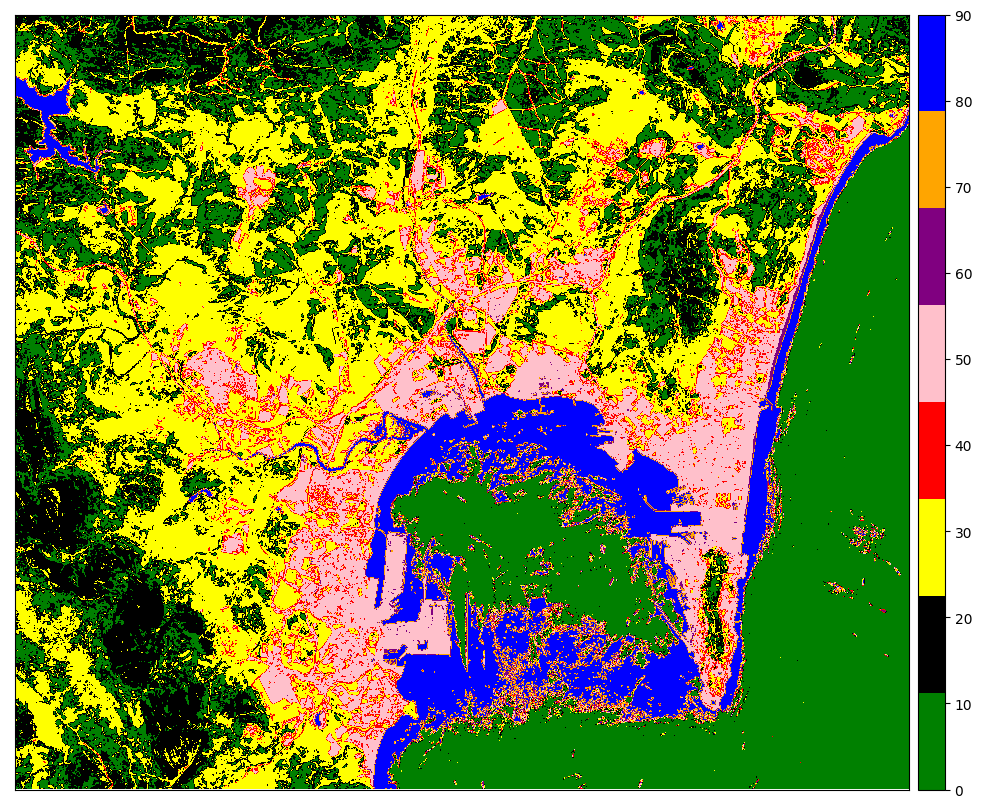

<AxesSubplot: >

In [ ]:
import earthpy.plot as ep
from matplotlib.colors import ListedColormap

ep.plot_bands(y_pred_bayes.reshape(2309, 2001).T,cmap=ListedColormap(['green','black','yellow','red','pink','purple', 'orange', 'blue']))

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(dfn, dfCode)
y_pred_bayes = nb.predict(dftn)

In [ ]:
import earthpy.plot as ep
from matplotlib.colors import ListedColormap

ep.plot_bands(y_pred_bayes.reshape(2309, 2001).T,cmap=ListedColormap(['green','black','yellow','red','pink','purple', 'orange', 'blue']))

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier(n_neighbors=15)

# Fit
modelKNN.fit(dfn, dfCode)

#Predict
y_predKNN = modelKNN.predict(dftn)

without ndwi and ndvi values

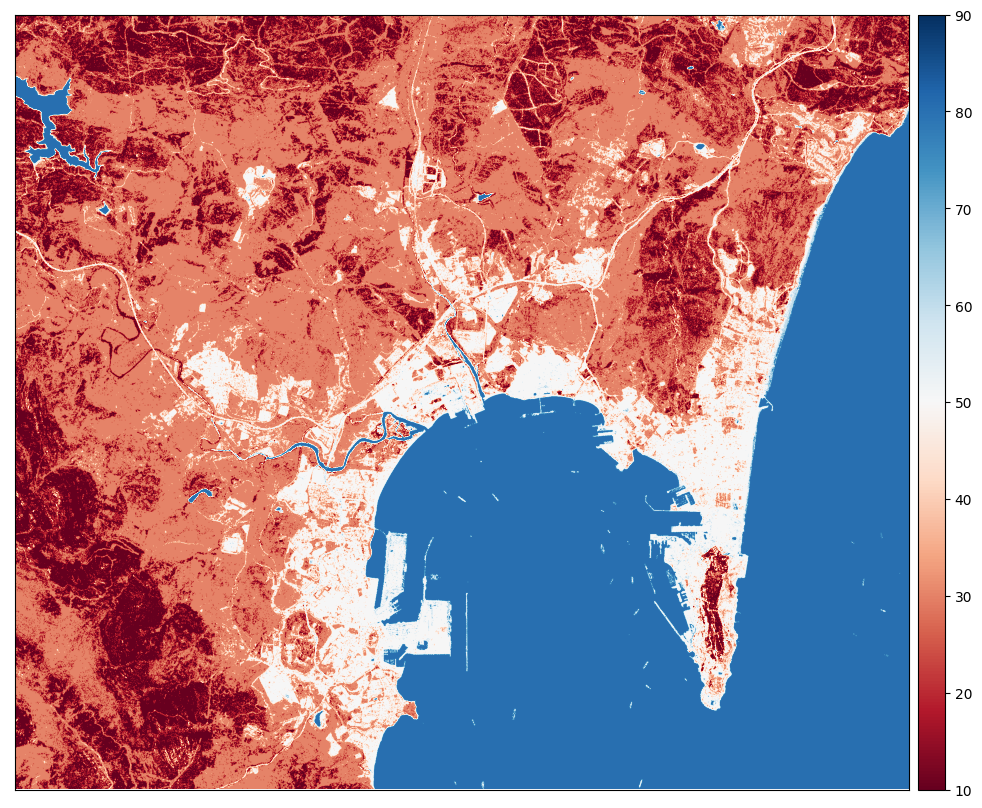

<AxesSubplot: >

In [ ]:
import earthpy.plot as ep
from matplotlib.colors import ListedColormap

ep.plot_bands(y_predKNN.reshape(2309, 2001).T,cmap="RdBu")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN2 = KNeighborsClassifier(n_neighbors=15)

# Fit
modelKNN2.fit(df, dfCode)

#Predict
y_predKNN2 = modelKNN2.predict(dfTest)

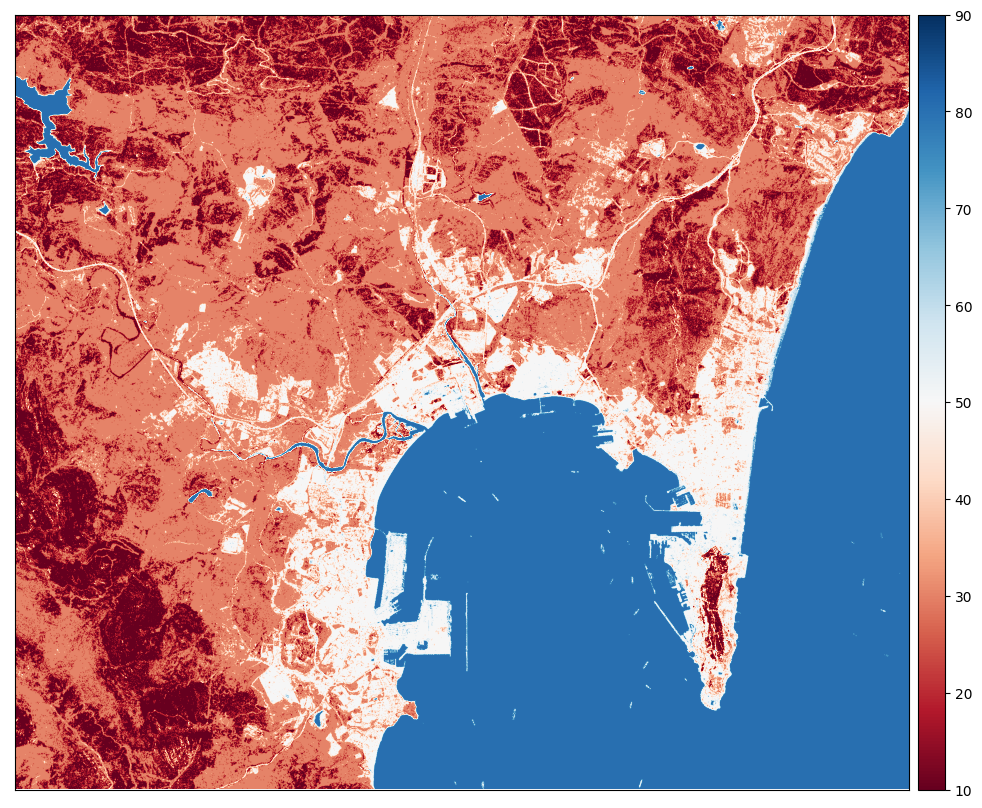

<AxesSubplot: >

In [ ]:
import earthpy.plot as ep
from matplotlib.colors import ListedColormap

ep.plot_bands(y_predKNN2.reshape(2309, 2001).T,cmap="RdBu")

### Decision Tree

In [ ]:
# Create Decision Tree classifer object
modelDecisionTree = DecisionTreeClassifier()

# Train Decision Tree Classifer
modelDecisionTree.fit(dfn, dfCode)

#Predict the response for test dataset
y_pred_DecisionTree = modelDecisionTree.predict(dftn)


In [ ]:
ep.plot_bands(y_pred_DecisionTree.reshape(2309, 2001),cmap=ListedColormap(['red','green','yellow','black','blue']))

In [ ]:
# Create Decision Tree classifer object
modelDecisionTree = DecisionTreeClassifier()

# Train Decision Tree Classifer
modelDecisionTree.fit(df, dfCode)

#Predict the response for test dataset
y_pred_DecisionTree = modelDecisionTree.predict(dfTest)

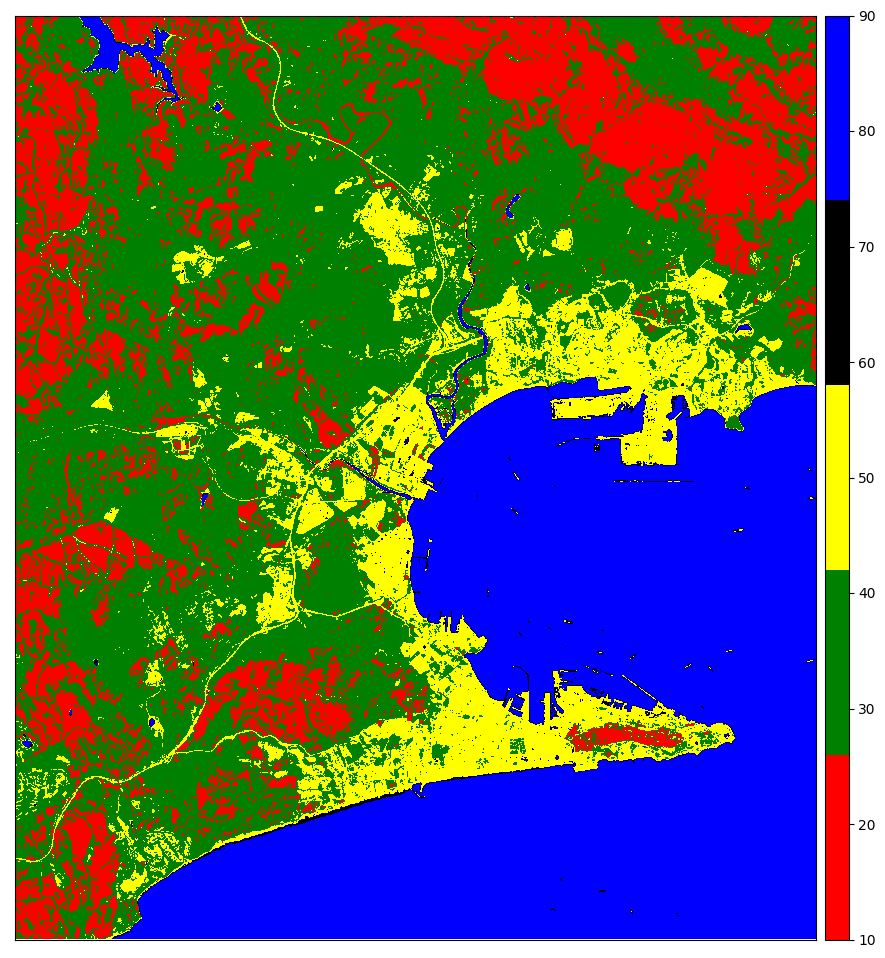

<AxesSubplot: >

In [ ]:
ep.plot_bands(y_pred_DecisionTree.reshape(2309, 2001),cmap=ListedColormap(['red','green','yellow','black','blue']))

### Fourth Part